## Advanced Regression Techniques 

In [44]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



In [45]:
data_path = Path("../../data/consumption/processed_power_usage_2023_2024.csv")
df = pd.read_csv(data_path)
df.head()


,Datetime,year,month,day,hour,day_of_week,consumption_kwh
0,2023-01-01 00:00:00,2023,1,1,0,6,0.840
1,2023-01-01 01:00:00,2023,1,1,1,6,0.731
2,2023-01-01 02:00:00,2023,1,1,2,6,0.254
3,2023-01-01 03:00:00,2023,1,1,3,6,0.270
4,2023-01-01 04:00:00,2023,1,1,4,6,0.318


<Axes: >

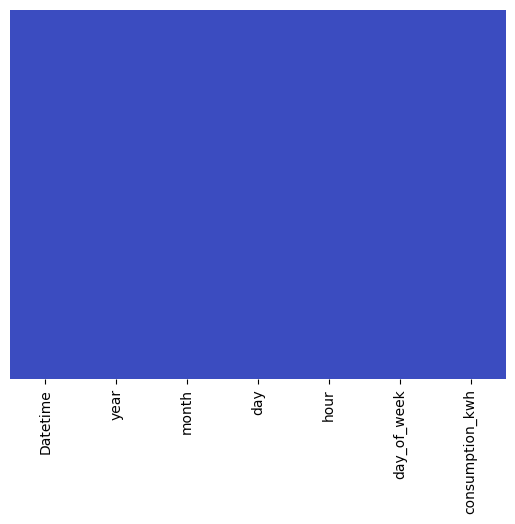

In [46]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Datetime         26281 non-null  object 
 1   year             26281 non-null  int64  
 2   month            26281 non-null  int64  
 3   day              26281 non-null  int64  
 4   hour             26281 non-null  int64  
 5   day_of_week      26281 non-null  int64  
 6   consumption_kwh  26281 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
##HAndle Categorical Features


In [51]:
columns=['year','month','day','hour','day_of_week','consumption_kwh']
final_df=df.copy()

In [ ]:
df_Train = final_df[final_df['Datetime'] < '2024-10-01 00:00:00']
df_Test = final_df[final_df['Datetime'] >= '2024-10-01 00:00:00']
df_Test_copy=df_Test.copy()
df_Train.head()


,Datetime,year,month,day,hour,day_of_week,consumption_kwh
0,2023-01-01 00:00:00,2023,1,1,0,6,0.840
1,2023-01-01 01:00:00,2023,1,1,1,6,0.731
2,2023-01-01 02:00:00,2023,1,1,2,6,0.254
3,2023-01-01 03:00:00,2023,1,1,3,6,0.270
4,2023-01-01 04:00:00,2023,1,1,4,6,0.318


In [ ]:
df_Test.drop(['consumption_kwh','Datetime'],axis=1,inplace=True)
df_Train.drop(['Datetime'],axis=1,inplace=True)


C:\Users\28k\AppData\Local\Temp\ipykernel_17400\3852287669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Train.drop(['Datetime'],axis=1,inplace=True)


In [64]:
X_train=df_Train.drop(['consumption_kwh'],axis=1)
y_train=df_Train['consumption_kwh']


## Prediciton and selecting the Algorithm

In [65]:
import xgboost
classifier=xgboost.XGBRegressor()

In [113]:
import xgboost
regressor=xgboost.XGBRegressor()

In [114]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [115]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [119]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=60,
            scoring = 'neg_mean_absolute_error',n_jobs = 5,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=60, n_jobs=5,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [120]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [121]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1
       )
regressor = random_cv.best_estimator_
regressor.fit(X_train, y_train)
y_pred = regressor.predict(df_Test)

In [123]:
y_pred

array([0.27136678, 0.22818476, 0.27260005, ..., 0.67577875, 0.3900503 ,
       0.9829793 ], dtype=float32)

In [ ]:
df_Test=pd.concat([df_Test,y_pred],axis=1)

In [127]:
import pickle
filename = '../../models/consumption_xgboost.pkl'
pickle.dump(regressor, open(filename, 'wb'))

MODEL PERFORMANCE METRICS
RMSE: 0.6185
MAE: 0.4197
R² Score: 0.3566
MAPE: 73.39%


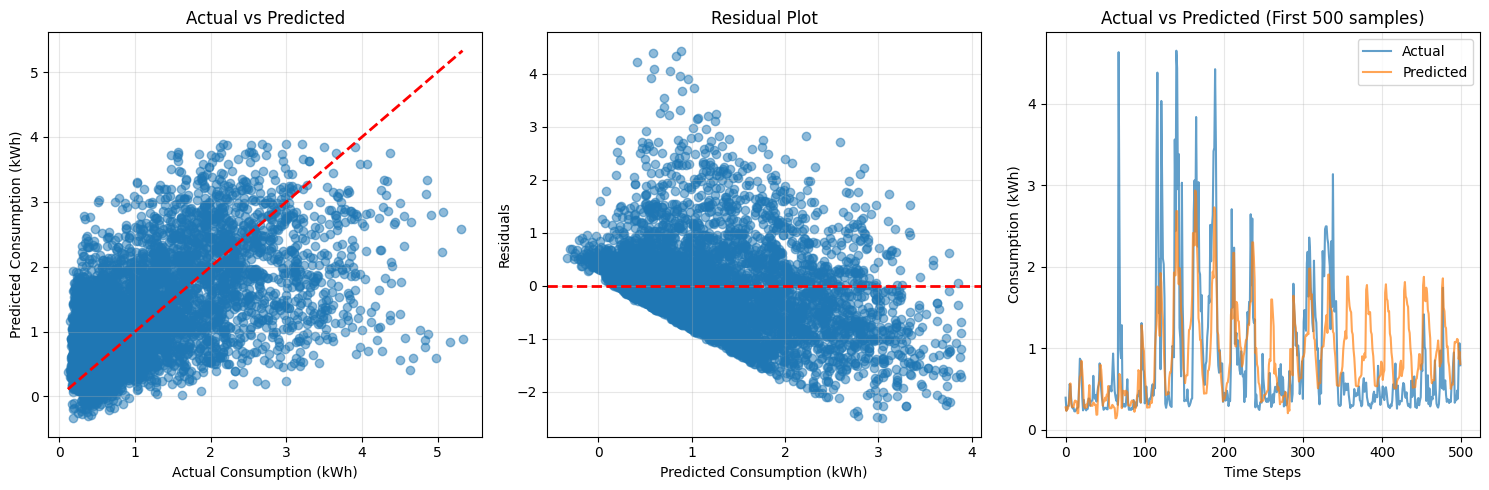

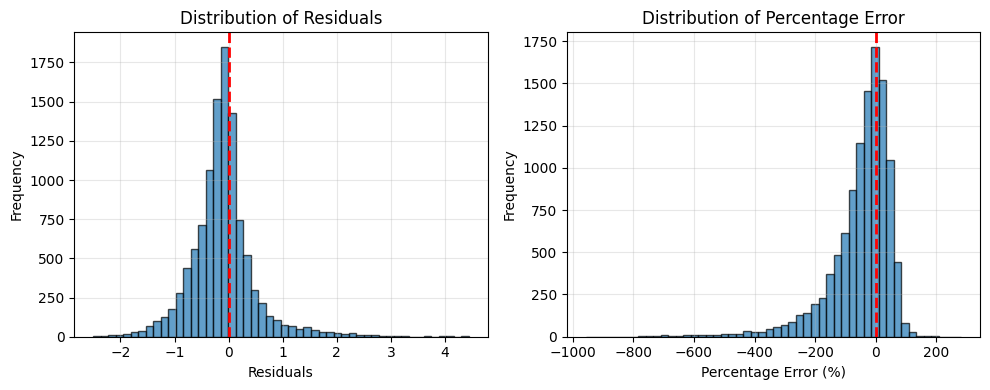

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate metrics
rmse = np.sqrt(mean_squared_error(df_Test_copy['consumption_kwh'], y_pred))
mae = mean_absolute_error(df_Test_copy['consumption_kwh'], y_pred)
r2 = r2_score(df_Test_copy['consumption_kwh'], y_pred)

# Mean Absolute Percentage Error
mape = np.mean(np.abs((df_Test_copy['consumption_kwh'] - y_pred) / df_Test_copy['consumption_kwh'])) * 100

print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print("=" * 50)

# 1. Actual vs Predicted Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_Test_copy['consumption_kwh'], y_pred, alpha=0.5)
plt.plot([df_Test_copy['consumption_kwh'].min(), df_Test_copy['consumption_kwh'].max()], 
         [df_Test_copy['consumption_kwh'].min(), df_Test_copy['consumption_kwh'].max()], 
         'r--', lw=2)
plt.xlabel('Actual Consumption (kWh)')
plt.ylabel('Predicted Consumption (kWh)')
plt.title('Actual vs Predicted')
plt.grid(True, alpha=0.3)

# 2. Residuals Plot
plt.subplot(1, 3, 2)
residuals = df_Test_copy['consumption_kwh'] - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Consumption (kWh)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# 3. Time Series Comparison (first 500 points for clarity)
plt.subplot(1, 3, 3)
sample_size = min(500, len(y_pred))
plt.plot(df_Test_copy['consumption_kwh'].iloc[:sample_size].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:sample_size], label='Predicted', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('Consumption (kWh)')
plt.title(f'Actual vs Predicted (First {sample_size} samples)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Error Distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
percentage_error = ((df_Test_copy['consumption_kwh'] - y_pred) / df_Test_copy['consumption_kwh']) * 100
plt.hist(percentage_error, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Error')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()